In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in all words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [23]:
# Build the dataset
block_size = 3 # Context length

X, Y = [], []
for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print("[",''.join(itos[i] for i in context),']', '--->', itos[ix])
        # print(','.join(str(i) for i in context))
        context = context[1:] + [ix] # Crop and append

print(len(X))
print(len(Y))

X = torch.tensor(X)
Y = torch.tensor(Y)

228146
228146


In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [24]:
# Say a 2 dim embedding
C = torch.randn((27, 2))
C

tensor([[ 0.2846, -1.9358],
        [ 0.3145, -1.5472],
        [-1.0283,  0.6474],
        [ 0.9221, -1.8654],
        [ 0.2284, -0.8503],
        [ 0.4032,  1.5376],
        [ 0.3729, -1.4852],
        [ 1.9793, -1.0287],
        [-0.4473, -1.1582],
        [-0.3049,  1.9802],
        [ 0.0379, -0.1158],
        [-1.0136, -0.3992],
        [ 1.0554, -0.6787],
        [ 1.5900,  0.2726],
        [-1.2778,  0.5813],
        [ 0.2154, -0.2763],
        [ 1.4194,  0.2854],
        [-0.7366, -0.4349],
        [ 0.5453, -0.7564],
        [ 0.2153,  0.5025],
        [-0.3275,  0.7731],
        [ 0.3683, -0.1074],
        [ 0.2447, -1.9193],
        [ 0.4503,  0.0208],
        [ 1.0340,  0.5632],
        [-1.5000, -0.0830],
        [-0.9164, -0.8660]])

In [45]:
# Say we want to embed a single integer, like 5
C[5]

tensor([-1.3742, -0.0870])

In [8]:
# One hot encoding... [0,0,0,0,1,0,0,0,...,0]
g = F.one_hot(torch.tensor(5), num_classes=27)
g

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [16]:
g.shape

torch.Size([27])

In [19]:
g.dtype
# 64 bit int
# But C is a float tensor!!

torch.int64

In [47]:
# Multiply the vector by C...
g.float() @ C

tensor([-1.3742, -0.0870])

In [50]:
# Equivalent to...
C[5]

tensor([-1.3742, -0.0870])

Interesting

In [55]:
X[:5]

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1]])

In [54]:
# First few examples using list / tensor indexing!
C[X][:5]

tensor([[[ 1.9117,  0.3338],
         [ 1.9117,  0.3338],
         [ 1.9117,  0.3338]],

        [[ 1.9117,  0.3338],
         [ 1.9117,  0.3338],
         [-1.3742, -0.0870]],

        [[ 1.9117,  0.3338],
         [-1.3742, -0.0870],
         [ 1.8357, -0.7231]],

        [[-1.3742, -0.0870],
         [ 1.8357, -0.7231],
         [ 1.8357, -0.7231]],

        [[ 1.8357, -0.7231],
         [ 1.8357, -0.7231],
         [ 1.8205,  1.8430]]])

In [26]:
C[X].shape

# For every one of the 32 by 3 integers, we retreieve the embedding here!

torch.Size([32, 3, 2])

In [27]:
X[13,2]

tensor(1)

In [28]:
C[X][13, 2]

tensor([0.8462, 0.0423])

In [29]:
C[1]

tensor([0.8462, 0.0423])

In [32]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

# Construct hidden layer!

In [25]:
W1 = torch.randn((6, 100))
# Why 6? Because we have 3, 2 at the end there, because we have 2 dim embeddings, and we have 3 of them.
b1 = torch.randn(100)

In [60]:
emb @ W1 + b1
# Can't multiply :( because can't broadcast as they are stacked up. We need to concatenate the inputs together.

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [61]:
emb[:, 0, :]

tensor([[-1.1481, -0.5969],
        [-1.1481, -0.5969],
        [-1.1481, -0.5969],
        [-2.2405, -1.7660],
        [ 1.5219, -1.2744],
        [-1.1481, -0.5969],
        [-1.1481, -0.5969],
        [-1.1481, -0.5969],
        [ 0.2583, -0.1362],
        [ 1.3946, -0.0972],
        [-0.5042,  0.1918],
        [-2.6404,  2.2716],
        [-1.1481, -0.5969],
        [-1.1481, -0.5969],
        [-1.1481, -0.5969],
        [ 0.8462,  0.0423],
        [-1.1481, -0.5969],
        [-1.1481, -0.5969],
        [-1.1481, -0.5969],
        [-0.5042,  0.1918],
        [-1.1870,  1.0311],
        [ 0.8462,  0.0423],
        [-1.0291,  1.1611],
        [-2.2405, -1.7660],
        [ 1.3946, -0.0972],
        [-1.1481, -0.5969],
        [-1.1481, -0.5969],
        [-1.1481, -0.5969],
        [-1.1870,  1.0311],
        [ 0.2583, -0.1362],
        [ 0.2817, -0.1495],
        [-0.2327,  0.0818]])

In [69]:
z = emb[:, 0, :][:5]
z
# But this is just the first dimension, of the 3

tensor([[-1.1481, -0.5969],
        [-1.1481, -0.5969],
        [-1.1481, -0.5969],
        [-2.2405, -1.7660],
        [ 1.5219, -1.2744]])

In [66]:
emb[:, 0, :][:5],emb[:, 1, :][:5],emb[:, 2, :][:5]


(tensor([[-1.1481, -0.5969],
         [-1.1481, -0.5969],
         [-1.1481, -0.5969],
         [-2.2405, -1.7660],
         [ 1.5219, -1.2744]]),
 tensor([[-1.1481, -0.5969],
         [-1.1481, -0.5969],
         [-2.2405, -1.7660],
         [ 1.5219, -1.2744],
         [ 1.5219, -1.2744]]),
 tensor([[-1.1481, -0.5969],
         [-2.2405, -1.7660],
         [ 1.5219, -1.2744],
         [ 1.5219, -1.2744],
         [ 0.8462,  0.0423]]))

In [70]:
z.shape

torch.Size([5, 2])

In [71]:
len(z)

5

In [72]:
torch.unbind(torch.tensor([[1,2,3],
                            [4,5,6],
                            [7,8,9]]))

(tensor([1, 2, 3]), tensor([4, 5, 6]), tensor([7, 8, 9]))

In [73]:
torch.unbind(emb, 1)

(tensor([[-1.1481, -0.5969],
         [-1.1481, -0.5969],
         [-1.1481, -0.5969],
         [-2.2405, -1.7660],
         [ 1.5219, -1.2744],
         [-1.1481, -0.5969],
         [-1.1481, -0.5969],
         [-1.1481, -0.5969],
         [ 0.2583, -0.1362],
         [ 1.3946, -0.0972],
         [-0.5042,  0.1918],
         [-2.6404,  2.2716],
         [-1.1481, -0.5969],
         [-1.1481, -0.5969],
         [-1.1481, -0.5969],
         [ 0.8462,  0.0423],
         [-1.1481, -0.5969],
         [-1.1481, -0.5969],
         [-1.1481, -0.5969],
         [-0.5042,  0.1918],
         [-1.1870,  1.0311],
         [ 0.8462,  0.0423],
         [-1.0291,  1.1611],
         [-2.2405, -1.7660],
         [ 1.3946, -0.0972],
         [-1.1481, -0.5969],
         [-1.1481, -0.5969],
         [-1.1481, -0.5969],
         [-1.1870,  1.0311],
         [ 0.2583, -0.1362],
         [ 0.2817, -0.1495],
         [-0.2327,  0.0818]]),
 tensor([[-1.1481, -0.5969],
         [-1.1481, -0.5969],
         [-2

In [75]:
print(torch.cat(torch.unbind(emb, 1), 1)[:4])
print(torch.cat(torch.unbind(emb, 1), 1).shape)

tensor([[-1.1481, -0.5969, -1.1481, -0.5969, -1.1481, -0.5969],
        [-1.1481, -0.5969, -1.1481, -0.5969, -2.2405, -1.7660],
        [-1.1481, -0.5969, -2.2405, -1.7660,  1.5219, -1.2744],
        [-2.2405, -1.7660,  1.5219, -1.2744,  1.5219, -1.2744]])
torch.Size([32, 6])


In [77]:
# But there is a better way to do this!

a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [78]:
a.shape

torch.Size([18])

In [79]:
a.view((2,9))

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [80]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [82]:
# a.view is very efficient!
a.storage()
# Always is stored as this anyway as a 1d tensor!

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [83]:
emb.view(32,6)

tensor([[-1.1481, -0.5969, -1.1481, -0.5969, -1.1481, -0.5969],
        [-1.1481, -0.5969, -1.1481, -0.5969, -2.2405, -1.7660],
        [-1.1481, -0.5969, -2.2405, -1.7660,  1.5219, -1.2744],
        [-2.2405, -1.7660,  1.5219, -1.2744,  1.5219, -1.2744],
        [ 1.5219, -1.2744,  1.5219, -1.2744,  0.8462,  0.0423],
        [-1.1481, -0.5969, -1.1481, -0.5969, -1.1481, -0.5969],
        [-1.1481, -0.5969, -1.1481, -0.5969,  0.2583, -0.1362],
        [-1.1481, -0.5969,  0.2583, -0.1362,  1.3946, -0.0972],
        [ 0.2583, -0.1362,  1.3946, -0.0972, -0.5042,  0.1918],
        [ 1.3946, -0.0972, -0.5042,  0.1918, -2.6404,  2.2716],
        [-0.5042,  0.1918, -2.6404,  2.2716, -0.5042,  0.1918],
        [-2.6404,  2.2716, -0.5042,  0.1918,  0.8462,  0.0423],
        [-1.1481, -0.5969, -1.1481, -0.5969, -1.1481, -0.5969],
        [-1.1481, -0.5969, -1.1481, -0.5969,  0.8462,  0.0423],
        [-1.1481, -0.5969,  0.8462,  0.0423, -2.6404,  2.2716],
        [ 0.8462,  0.0423, -2.6404,  2.2

In [84]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [86]:
h = emb.view(32, 6) @ W1 + b1

In [87]:
h.shape

torch.Size([32, 100])

In [88]:
# Can also use -1 to infer the size
h = emb.view(-1, 6) @ W1 + b1

# Cat is inefficient as it has to use new memory..

In [10]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h

NameError: name 'emb' is not defined

Let's also check the broadcasting of adding b1

In [91]:
(emb.view(-1, 6) @ W1 ). shape

torch.Size([32, 100])

In [93]:
b1.shape

torch.Size([100])

In [ ]:
# 32, 100
# 100

# ---->

# 32, 100
#  1, 100

# It will copy vertically for each of the rows of 32 and do an addition.

In [94]:
# Let's make the final layer -> softmax

In [26]:
W2 = torch.randn((100, 27))
# Input is 100, we have 27 chars...
b2 = torch.randn(27)

In [12]:
# Therefore the logits which are the outputs of the NN
logits = h @ W2 + b2
logits.shape

NameError: name 'h' is not defined

Just like in the vid beforehand, we want to exp them to get fake counts, then normalise them into a probability

In [97]:
counts = logits.exp()

In [100]:
prob = counts / counts.sum(1, keepdims=True)

In [102]:
prob[0].sum()
# Normalised :)

tensor(1.0000)

We have the actual letter that comes next

In [103]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [104]:
#  We'd like to index into the rows of prob, and in each row we want to pluck out prob assigned to correct character

In [105]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [106]:
prob[torch.arange(32), Y]

tensor([6.4076e-07, 8.0897e-08, 3.5541e-07, 9.1195e-10, 4.3579e-03, 5.1094e-12,
        2.6939e-03, 7.1771e-13, 2.9475e-09, 7.2163e-06, 7.0375e-07, 1.1212e-12,
        9.8832e-10, 2.6796e-01, 9.5690e-11, 2.7451e-04, 9.1488e-02, 5.9270e-07,
        3.3462e-11, 1.3674e-07, 1.1285e-10, 1.6482e-13, 5.3070e-11, 1.0518e-10,
        1.0460e-05, 1.3000e-10, 8.6704e-11, 2.7156e-10, 1.1301e-07, 1.3339e-06,
        2.9013e-04, 2.0449e-05])

In [111]:
loss = - prob[torch.arange(32), Y].log().mean()
# Negative log likelikehood loss

In [112]:
loss

tensor(16.9244)

In [113]:
# There is a cross entropy function in torch to calc this much more efficiently ;D

In [115]:
loss = F.cross_entropy(logits, Y)

In [115]:
C = torch.randn((27, 10))
W1 = torch.randn((30, 200))
b1 = torch.randn(200)
W2 = torch.randn((200, 27))
b2 = torch.randn(27)

In [116]:
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [117]:
sum(p.nelement() for p in parameters)

11897

In [118]:
lri, lossi, stepi = [], [], []

In [127]:
for i in  range(50000):
    # minibatch!
    ix = torch.randint(0,Xtr.shape[0],(32,))

    # Forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # Update

    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
    
    # lri.append(lre[i])
    lossi.append(loss.log10().item())
    stepi.append(i)

In [128]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
print(loss.item())


2.161421298980713


In [129]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())


2.2046098709106445


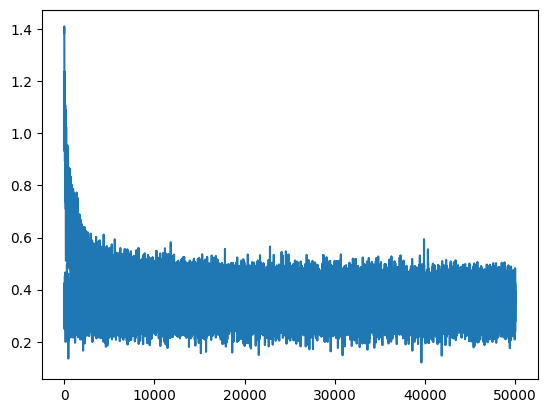

In [126]:
plt.plot(stepi, lossi)

In [89]:
# Build the dataset
def build_dataset(words):
    block_size = 3 # Context length
    X, Y = [], []
    for w in words:

        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print("[",''.join(itos[i] for i in context),']', '--->', itos[ix])
            # print(','.join(str(i) for i in context))
            context = context[1:] + [ix] # Crop and append

    print(len(X))
    print(len(Y))
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

182437
182437
22781
22781
22928
22928


vis

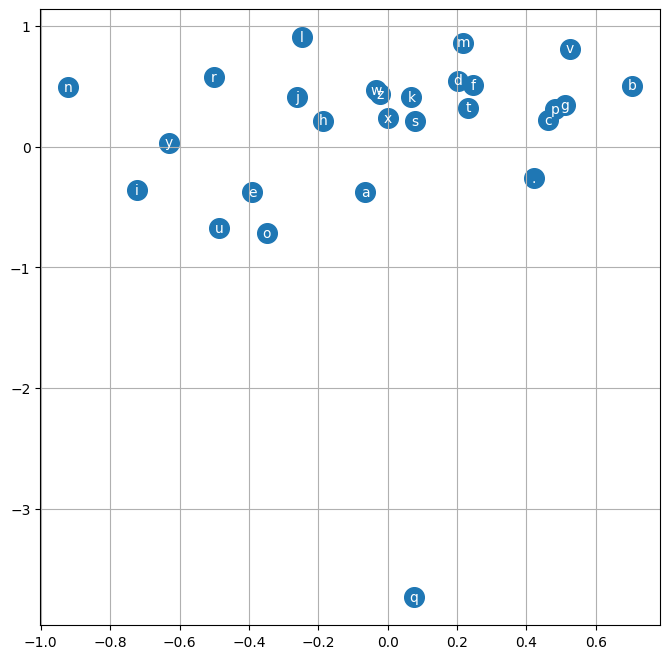

In [114]:
plt.figure(figsize=(8,8))

plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(),itos[i], ha="center", va="center", color="white")
plt.grid("minor")

# Let's sample from the model

In [132]:
for _ in range(30):
    out = []

    context = [0] * block_size

    while True:
        emb = C[torch.tensor([context])] #(1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2

        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))


matr.
corieralle.
linia.
imossatd.
malna.
kaliah.
omiah.
aasinvonnichani.
rathik.
dhyo.
merankistanile.
shaydneo.
haizalia.
kor.
rus.
aan.
juhna.
hes.
yazjiamarke.
minakion.
ela.
riyonnely.
zamiersenia.
ron.
ailina.
abriahna.
elie.
zaelaizaagon.
evenell.
avaunh.
